In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer
from phik import phik_matrix

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,5,13,6,6,-0.469819,0.358126,1.068105,-0.559650,-0.366905,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,4,6,16,9,0.591035,-0.396915,0.145834,-0.030798,0.471167,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,8,9,3,11,-0.679875,0.469326,0.349843,-0.288042,0.291470,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,8,9,6,4,-0.389456,0.626762,-1.074543,-1.521753,-1.150806,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,3,1,13,11,-0.120743,-0.615578,-1.064359,0.444142,0.428327,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [3]:
df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,8.193163,8.057878,8.084990,7.076388,6.286102,0.003413,-0.002639,0.005404,0.001656,-0.005399,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,5.904919,4.700226,4.197106,4.433308,4.120077,0.998940,1.001096,1.003277,1.001258,0.995965,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.377021,-4.535903,-4.182233,-4.468930,-4.149688,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000,-0.671810,-0.677757,-0.671055,-0.672635,-0.680243,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,7.000000,7.000000,8.000000,6.000000,6.000000,0.003536,-0.004299,0.006535,0.001663,-0.001574,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,11.000000,11.000000,11.000000,10.000000,9.000000,0.678679,0.673859,0.680903,0.673174,0.666996,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,44.000000,36.000000,28.000000,38.000000,30.000000,4.490521,4.270708,4.157538,4.230849,4.710316,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [4]:
df.set_index('id', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22  f_2

In [5]:
int_features = [x for x in df.columns if df[x].dtype == 'int64']
float_features = [x for x in df.columns if df[x].dtype == 'float64']

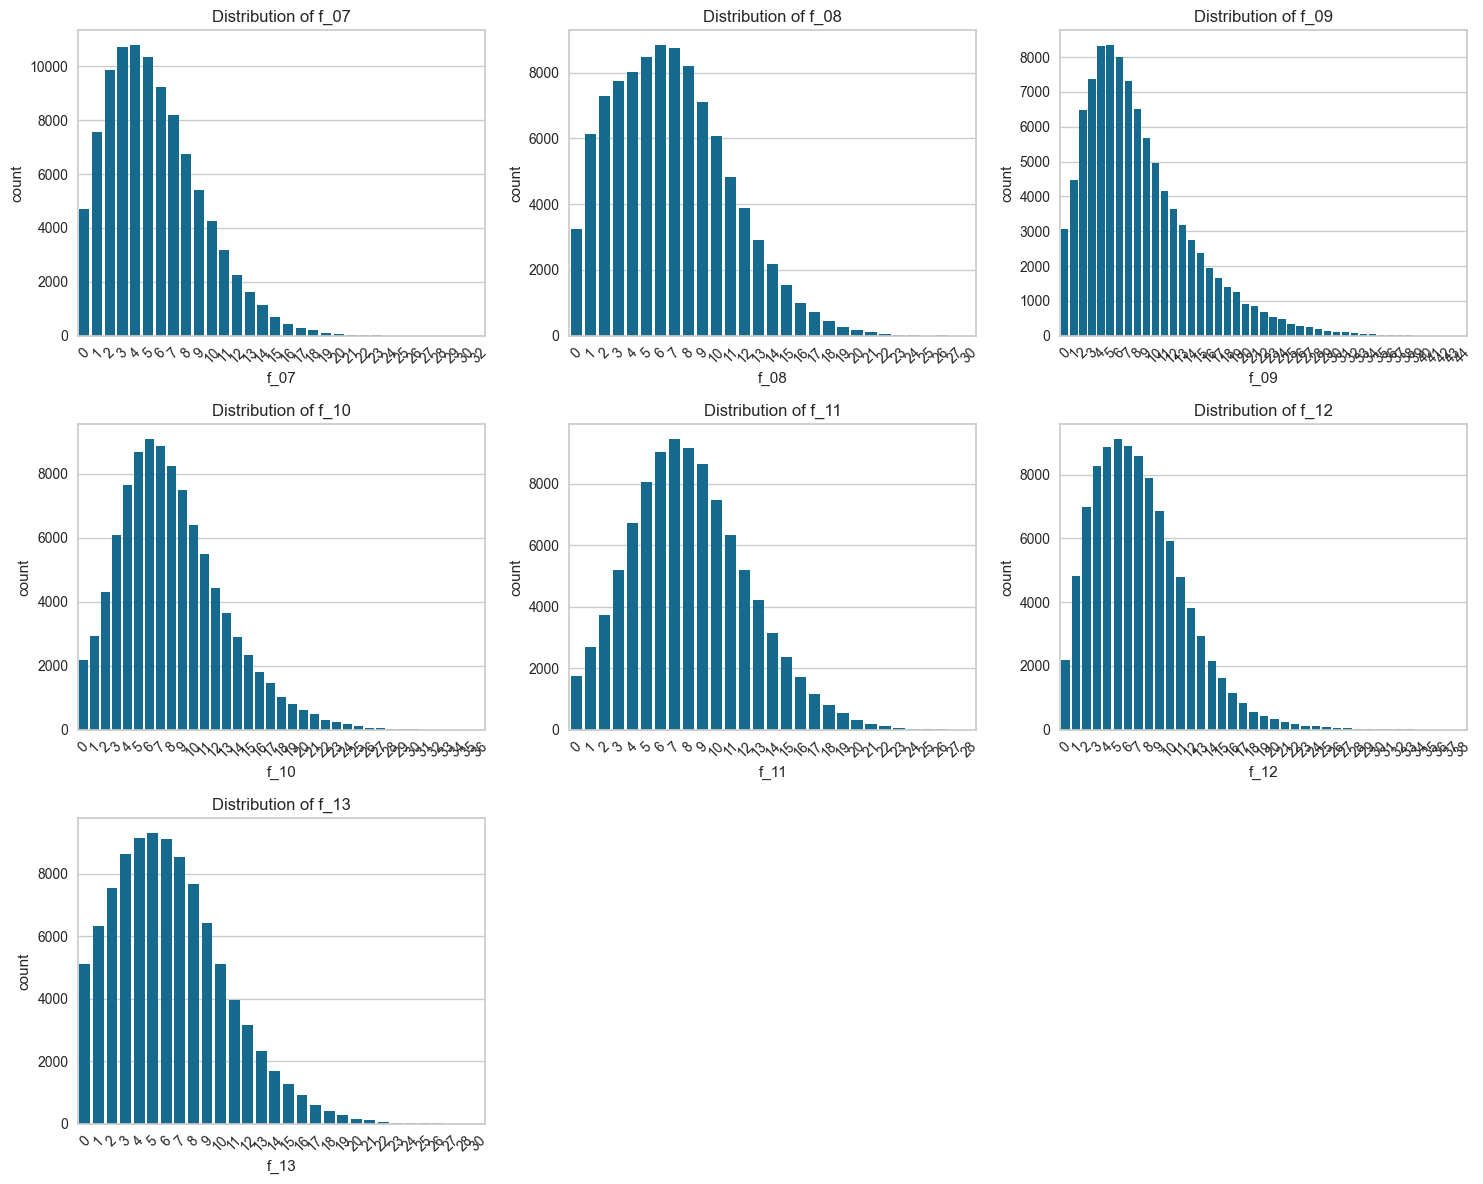

In [6]:
def cat_plots(data, features, cols=3, hue=None):
    n_features = len(features)
    rows = math.ceil(n_features / cols)
    
    plt.figure(figsize=(cols * 5, rows * 4))
    
    for i, col in enumerate(features):
        plt.subplot(rows, cols, i + 1)
        sns.countplot(data=data, x=col, hue=hue) 
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        
    plt.tight_layout()
    plt.show()

cat_plots(df, int_features)

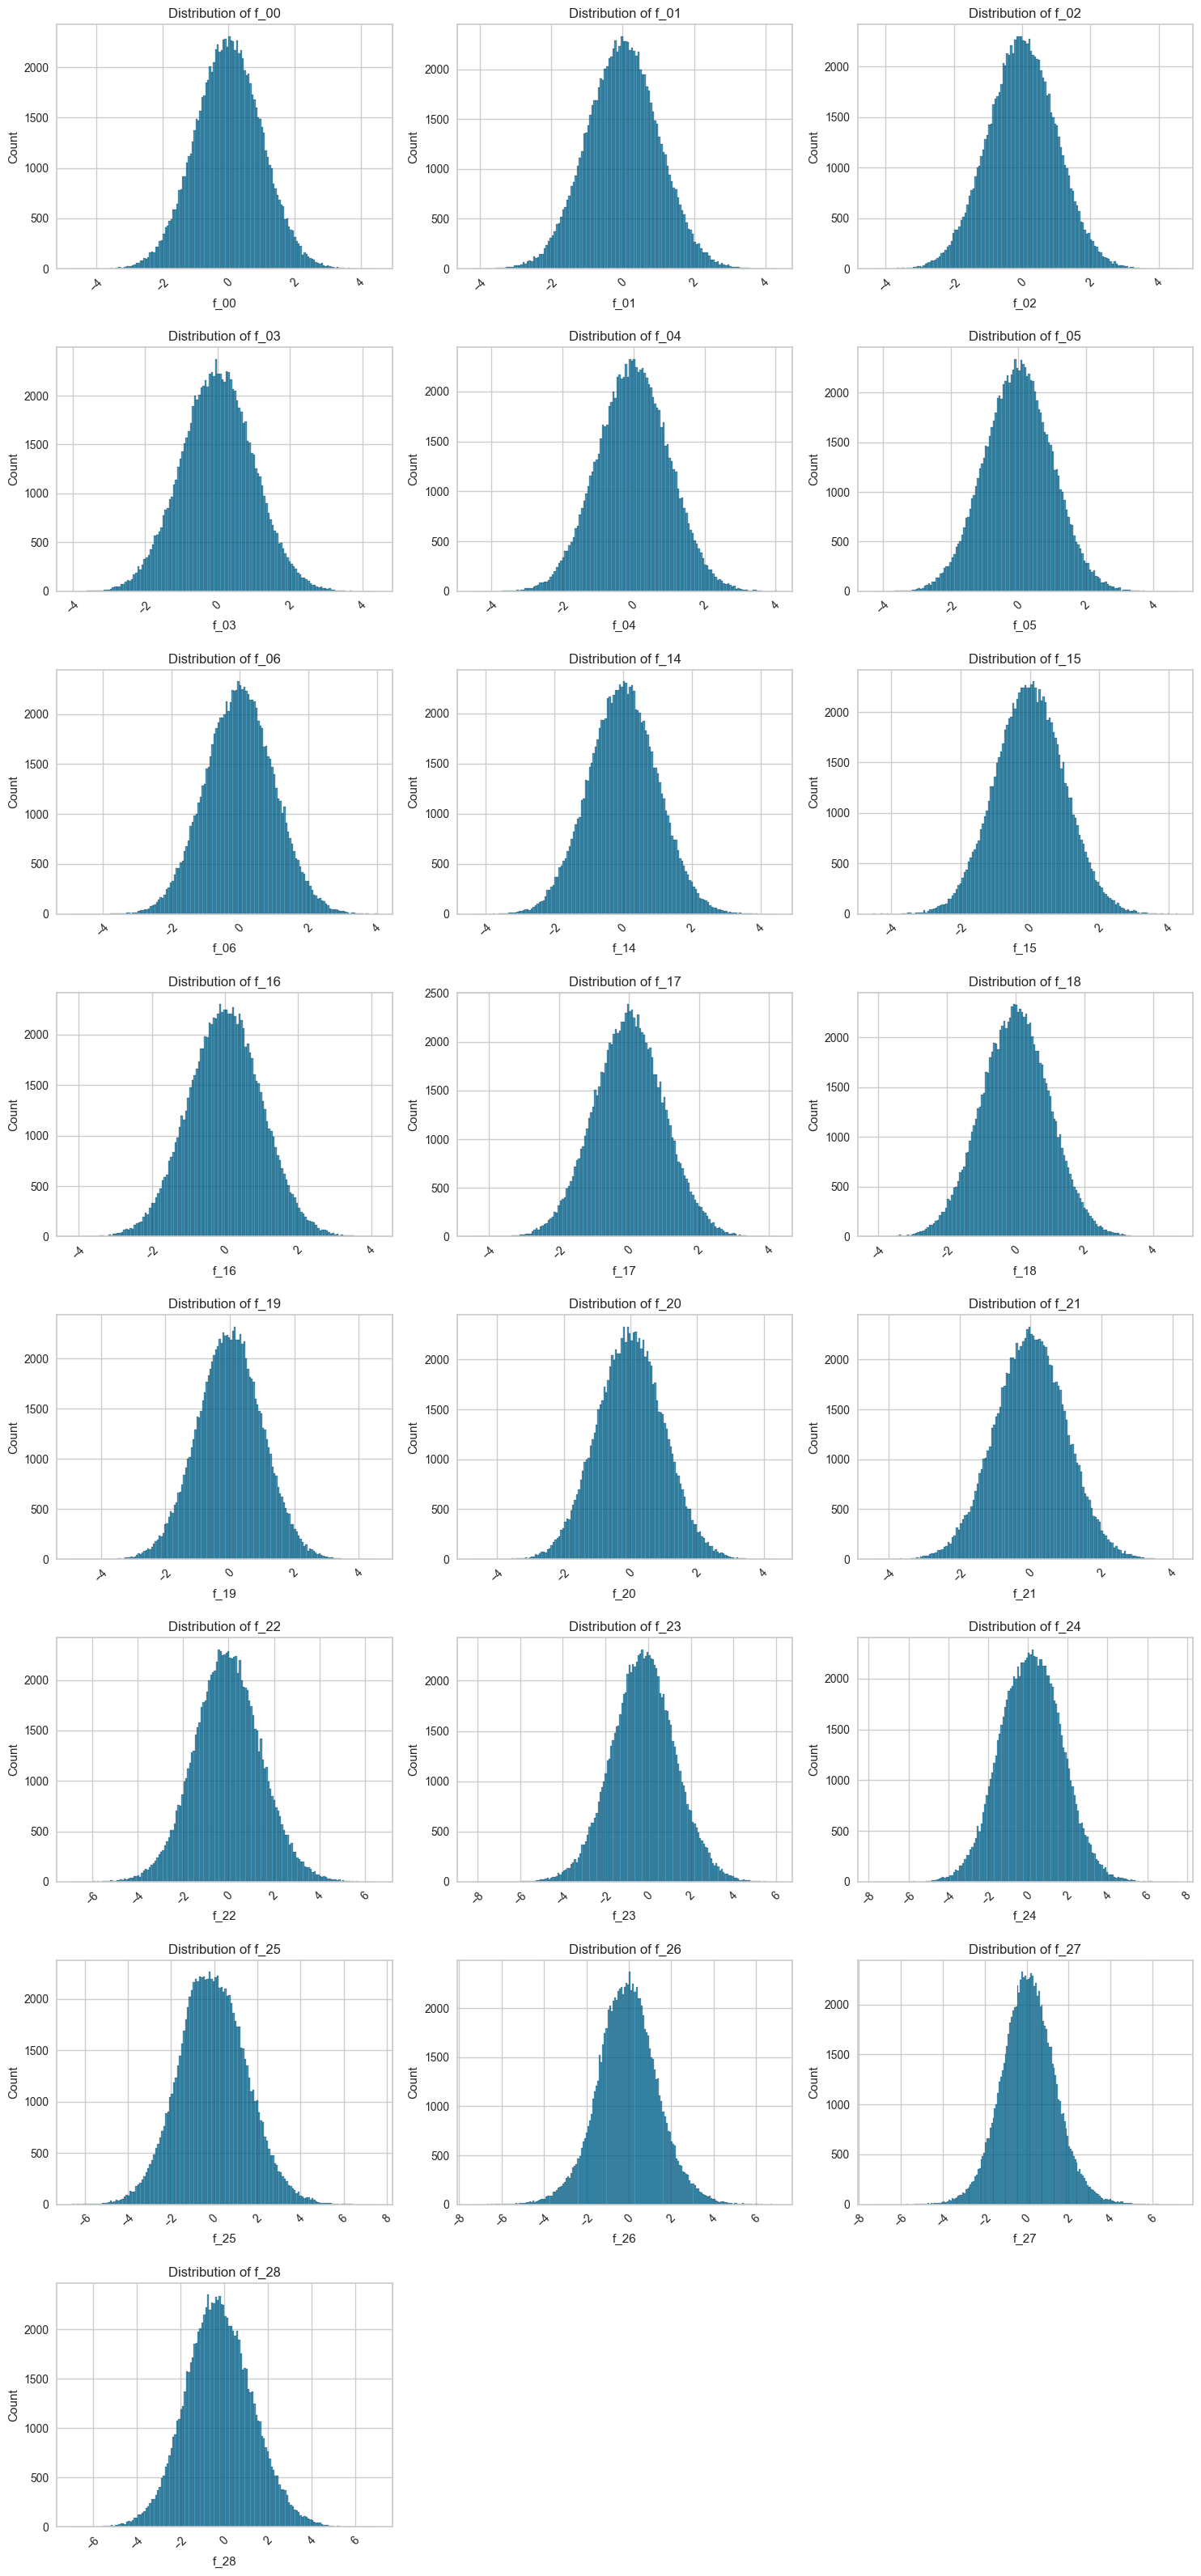

In [7]:
def hist_plots(data, features, cols=3, hue=None):
    n_features = len(features)
    rows = math.ceil(n_features / cols)
    
    plt.figure(figsize=(cols * 5, rows * 4))
    
    for i, col in enumerate(features):
        plt.subplot(rows, cols, i + 1)
        sns.histplot(data=data, x=col, hue=hue) 
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        
    plt.tight_layout()
    plt.show()

hist_plots(df, float_features)

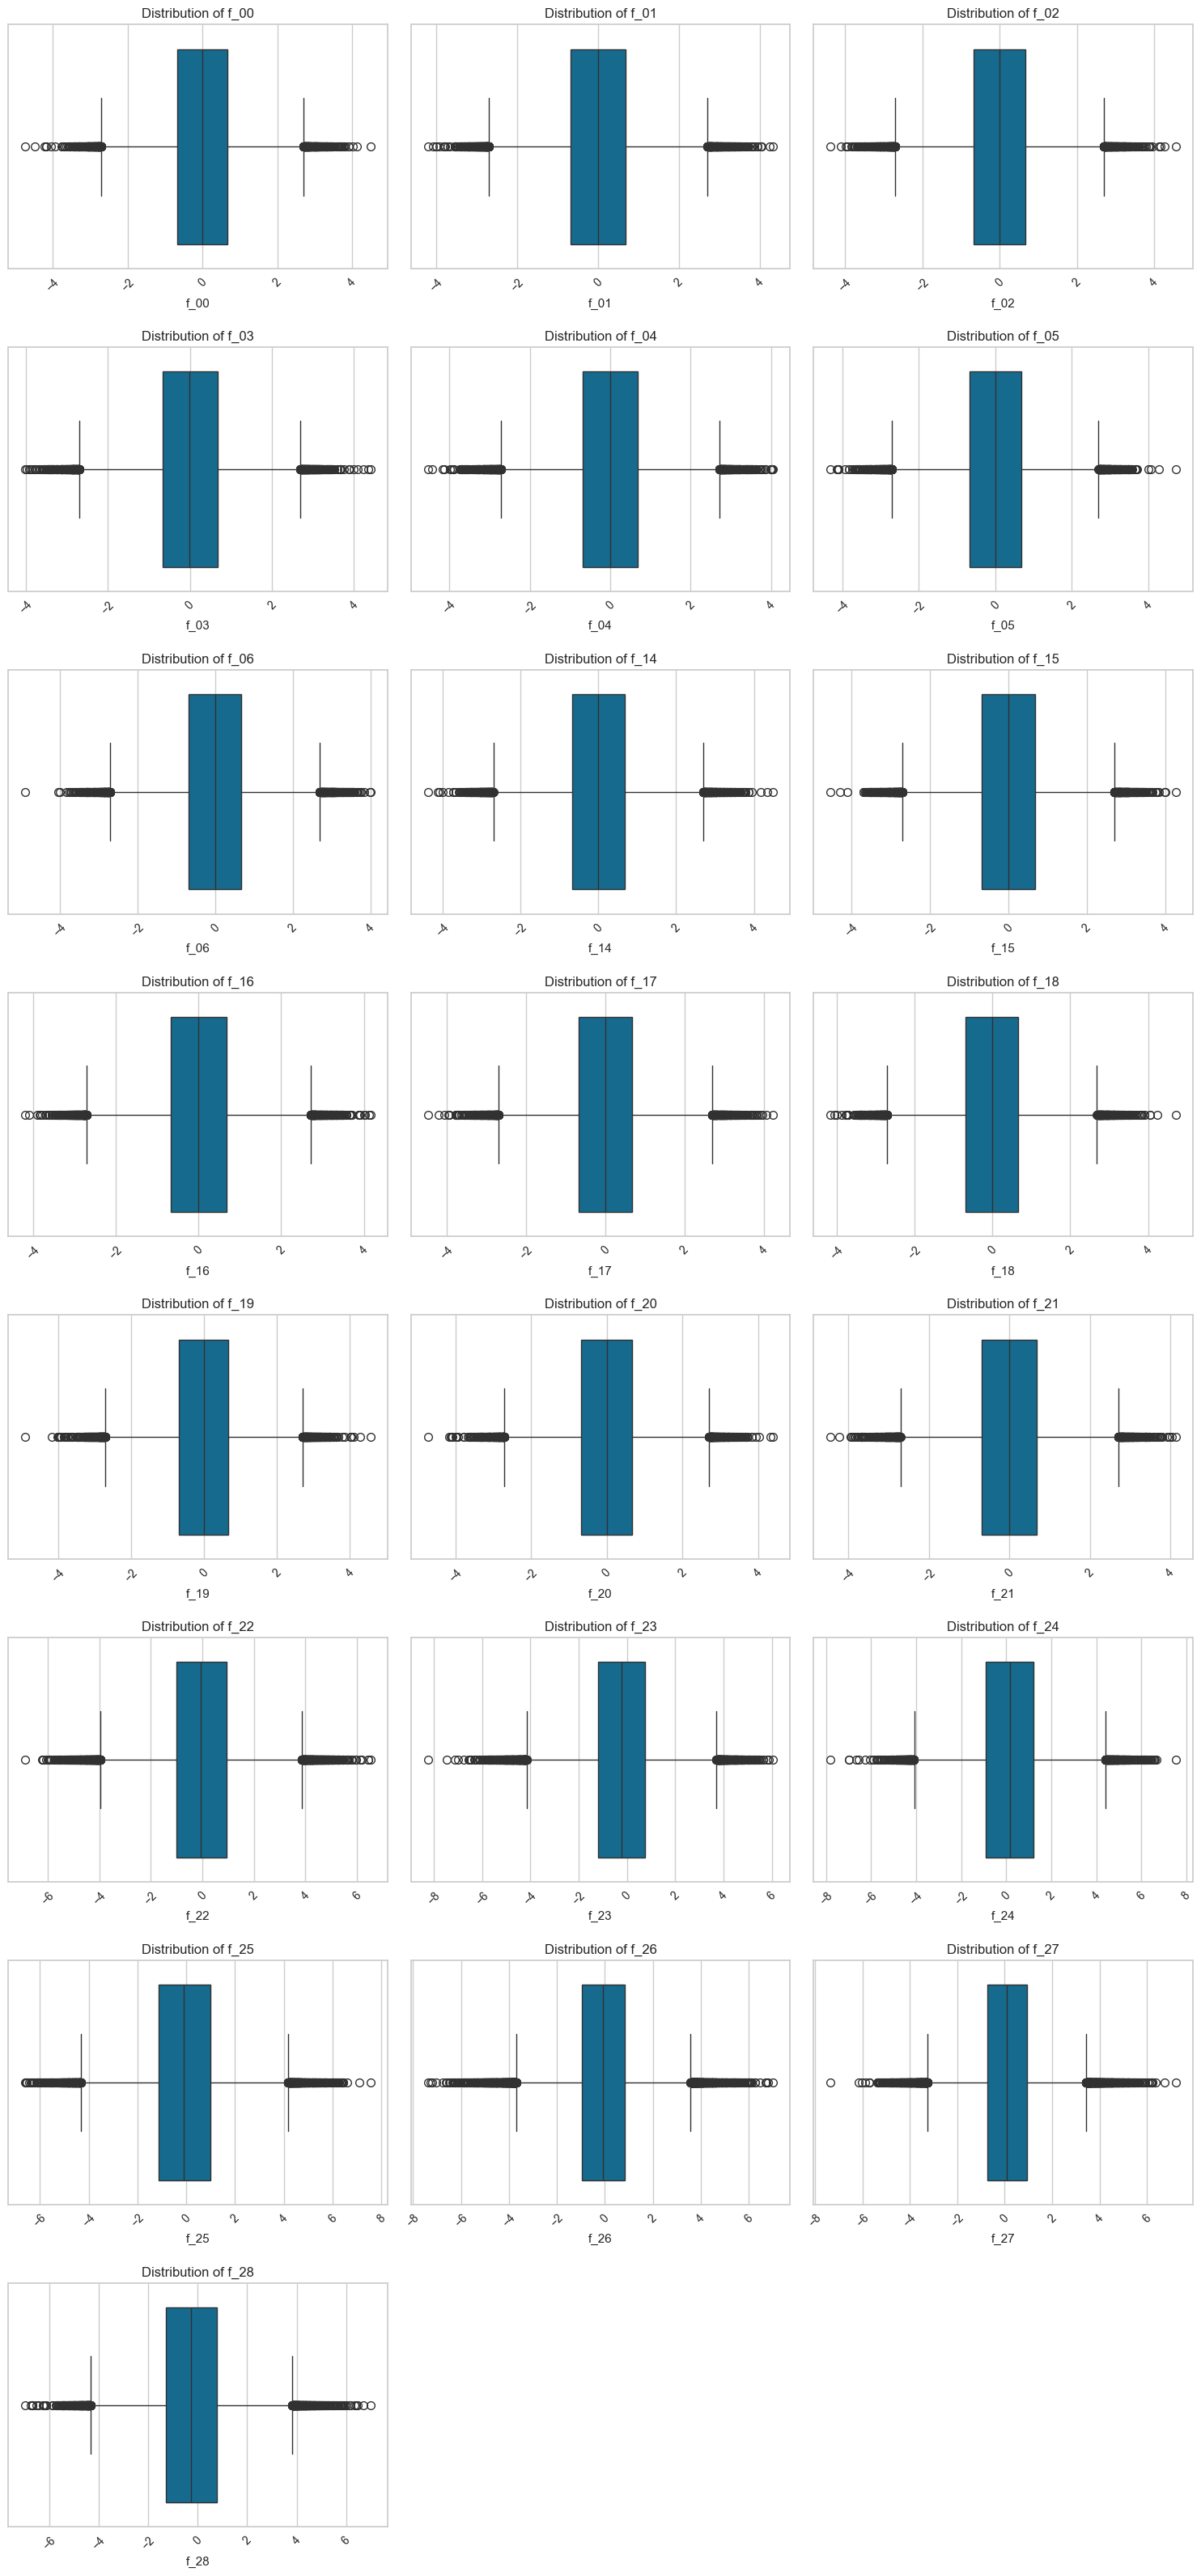

In [8]:
def box_plots(data, features, cols=3, hue=None):
    n_features = len(features)
    rows = math.ceil(n_features / cols)
    
    plt.figure(figsize=(cols * 5, rows * 4))
    
    for i, col in enumerate(features):
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(data=data, x=col, hue=hue) 
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        
    plt.tight_layout()
    plt.show()

box_plots(df, float_features)

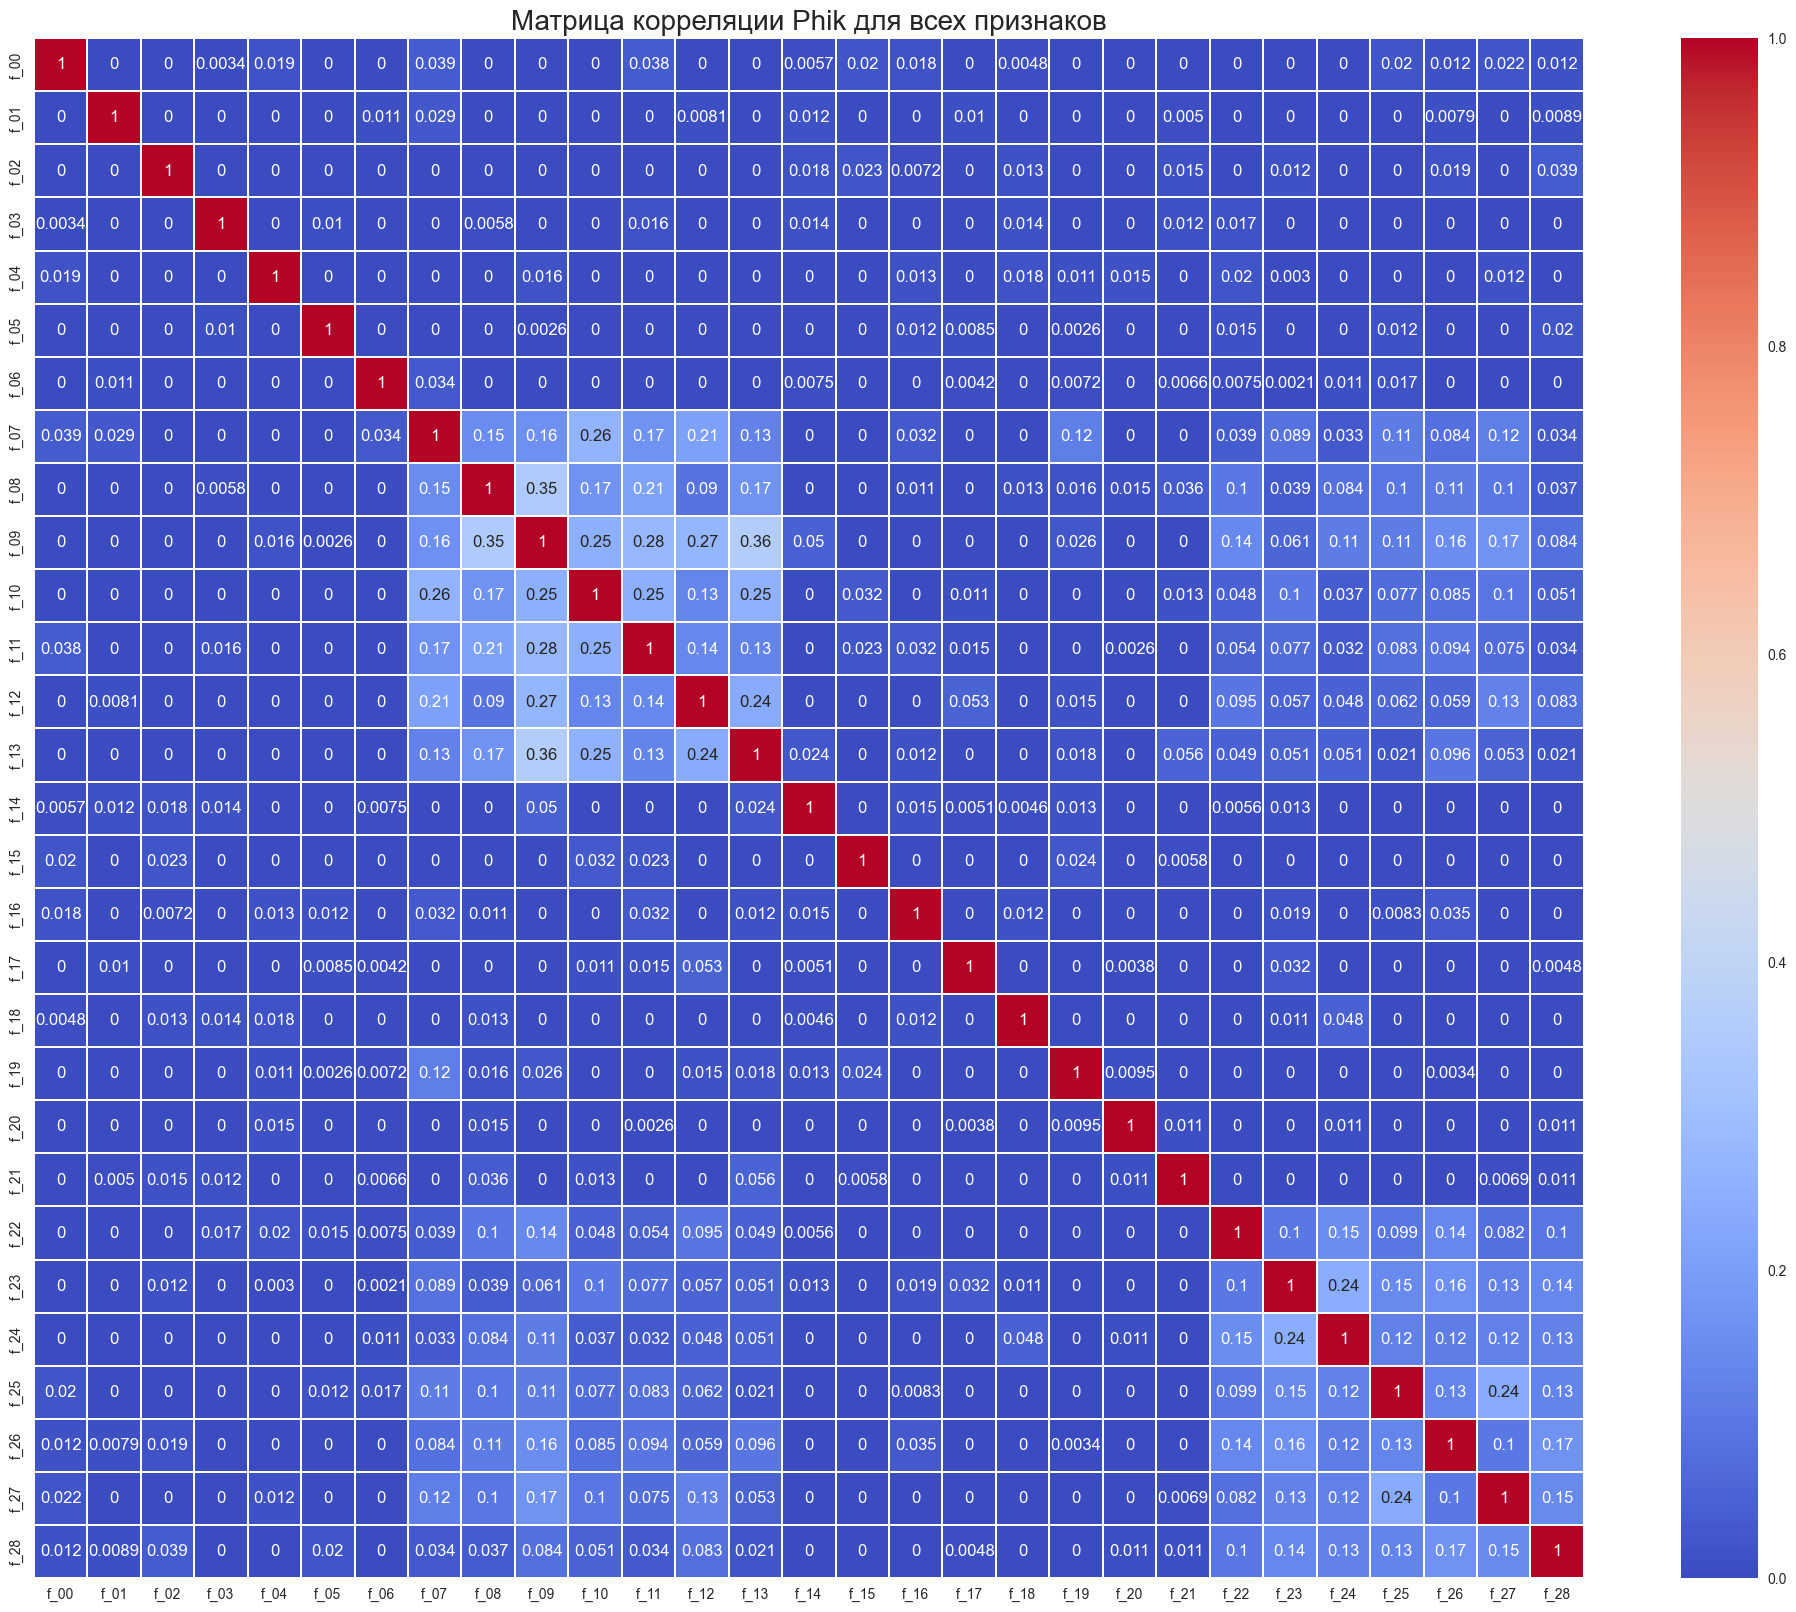

In [9]:
phik_matrix = df.phik_matrix(interval_cols=float_features)

plt.figure(figsize=(25, 20))

sns.heatmap(phik_matrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.1)

plt.title('Матрица корреляции Phik для всех признаков', fontsize=20)
plt.show()

Дропнем f_00 - f_06 и f_14 - f_21, потому что они не коррелируют с другими признаками - значит скорее всего являются шумом которые мешают распредлеить данные на кластеры

In [10]:
drop_features = [x for x in df.columns if 0 <= int(x[2:]) <= 6 or 14 <= int(x[2:]) <= 21]
df.drop(columns=drop_features, axis=1, inplace=True)

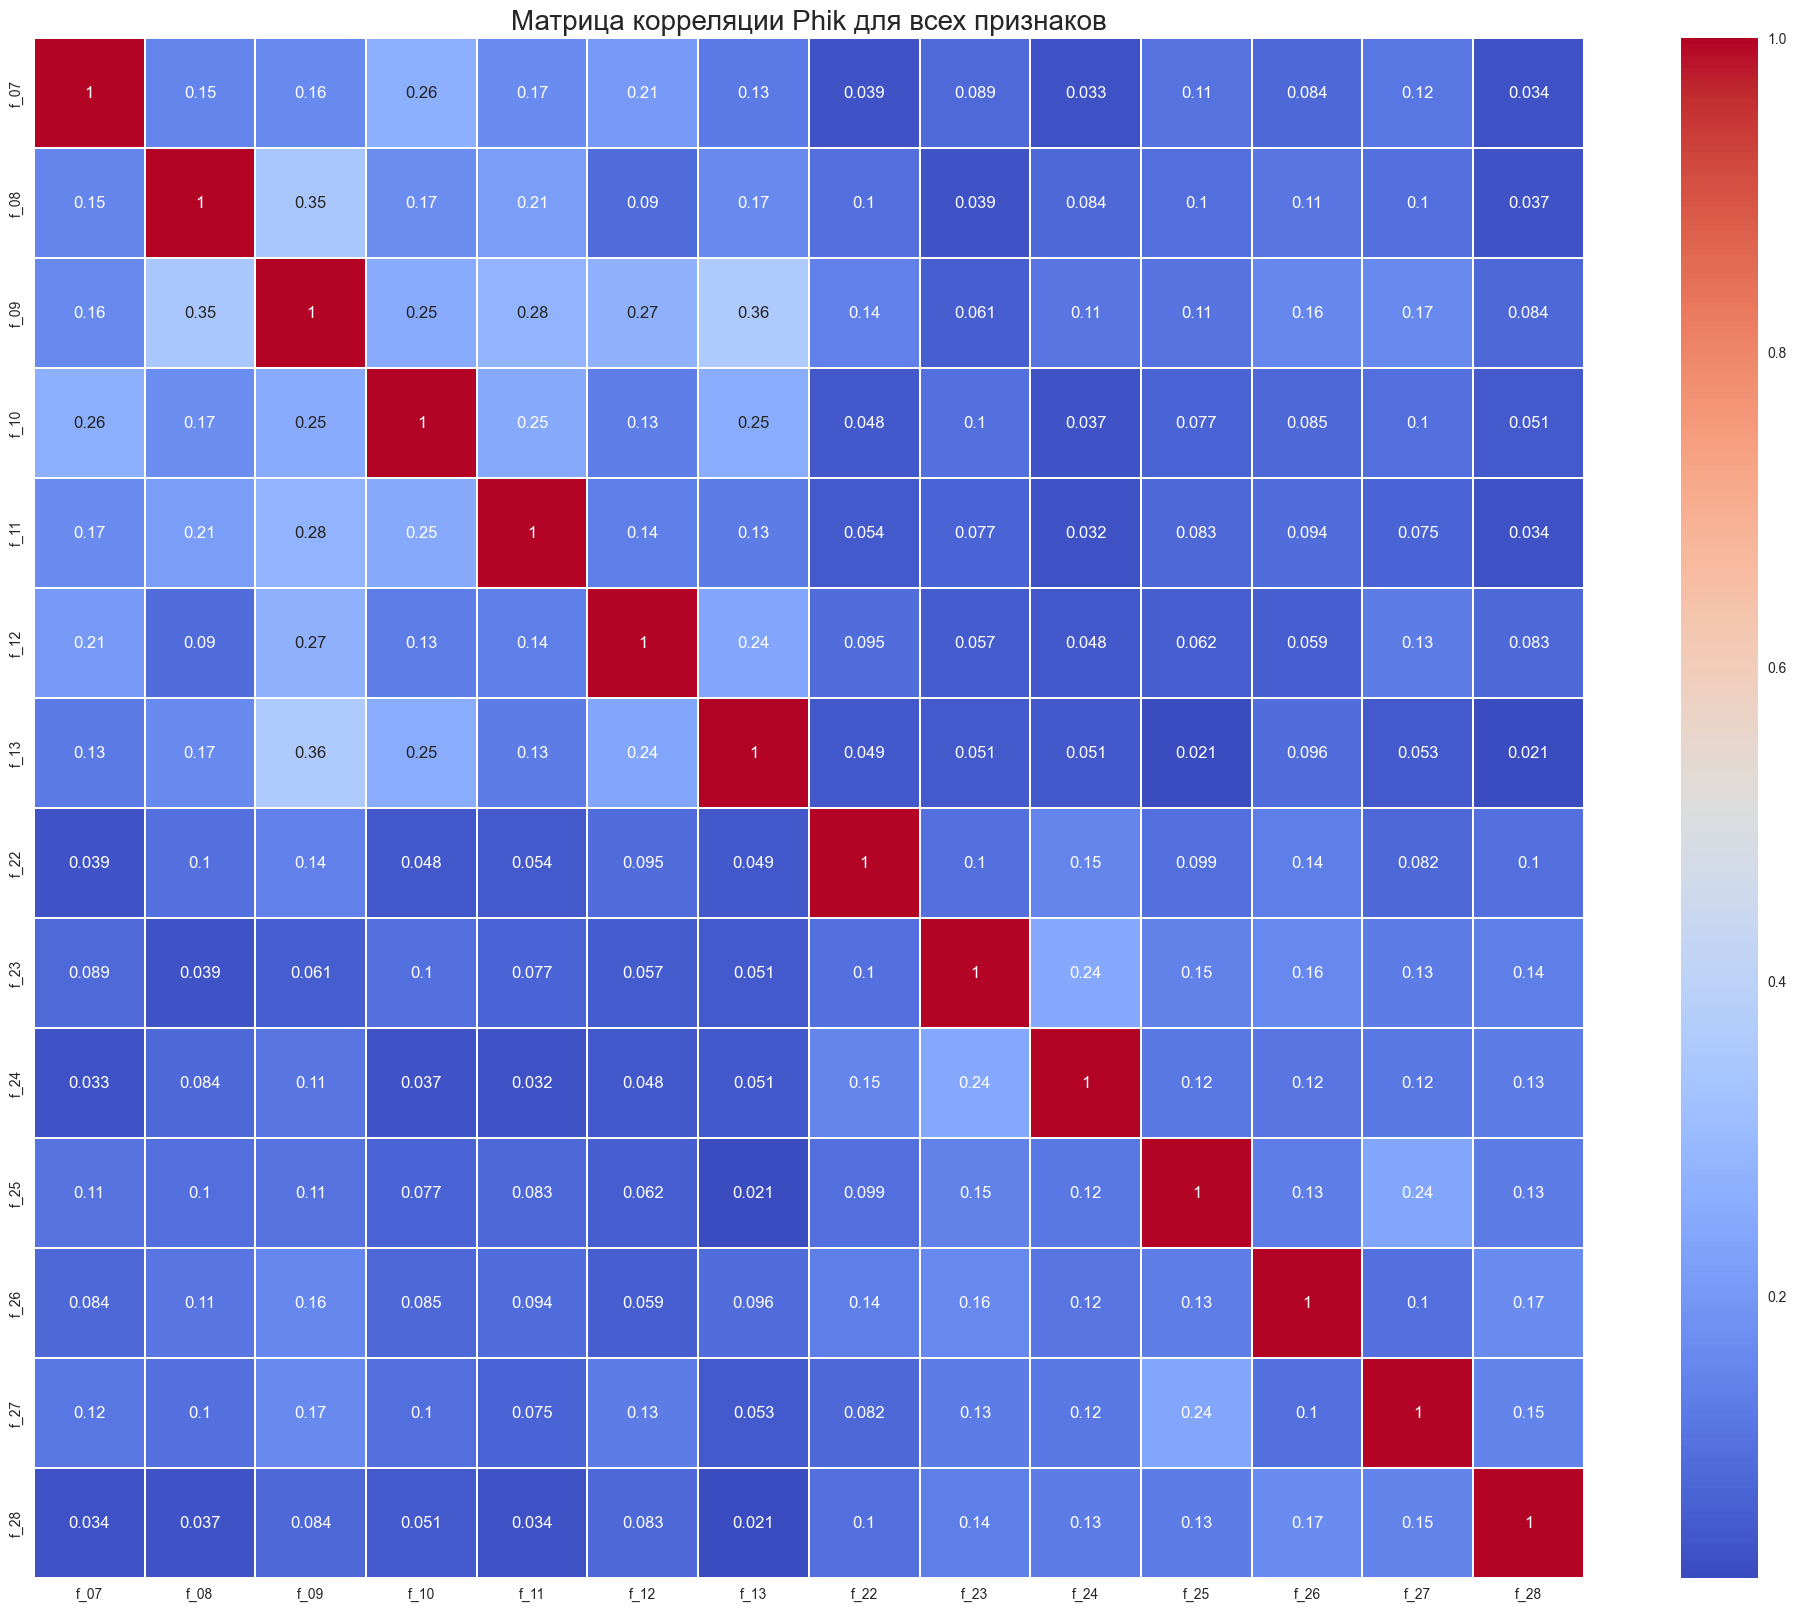

In [11]:
phik_matrix = df.phik_matrix(interval_cols=float_features)

plt.figure(figsize=(25, 20))

sns.heatmap(phik_matrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.1)

plt.title('Матрица корреляции Phik для всех признаков', fontsize=20)
plt.show()

# Baseline

In [12]:
X = df.copy()
X.head()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,
0,2,13,14,5,13,6,6,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,2,3,6,4,6,16,9,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,5,11,5,8,9,3,11,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,6,2,13,8,9,6,4,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,8,7,5,3,1,13,11,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [13]:
int_features = [x for x in X.columns if X[x].dtype == 'int64']
float_features = [x for x in X.columns if X[x].dtype == 'float64']

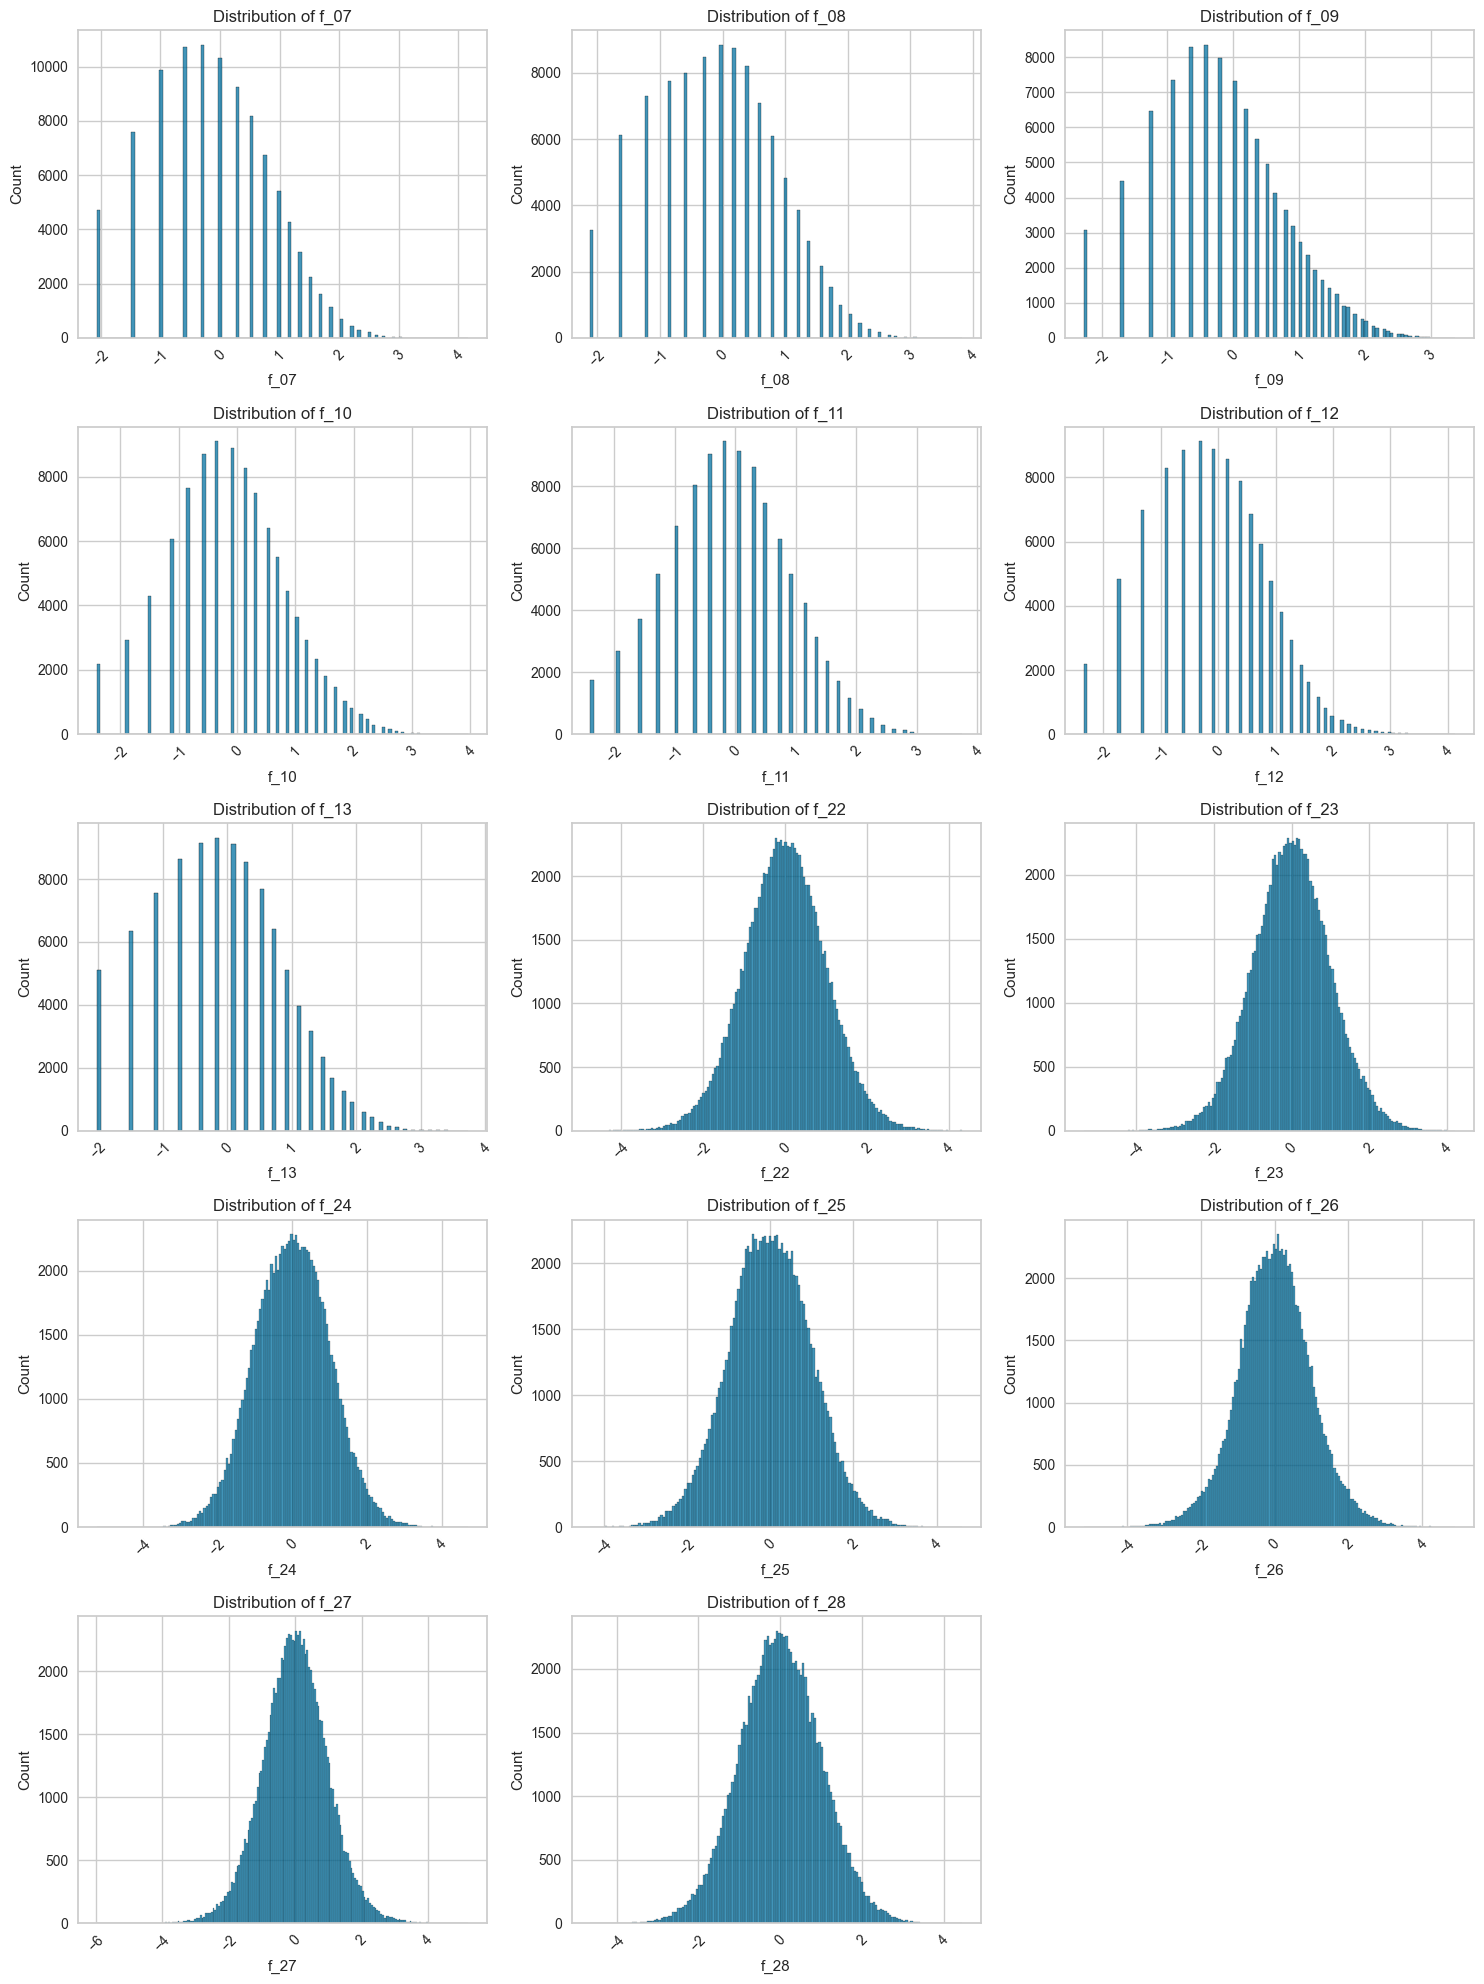

In [14]:
pt = PowerTransformer()
transformed_data = pt.fit_transform(X)
X = pd.DataFrame(transformed_data, columns=X.columns)

hist_plots(X, X.columns, cols=3, hue=None)

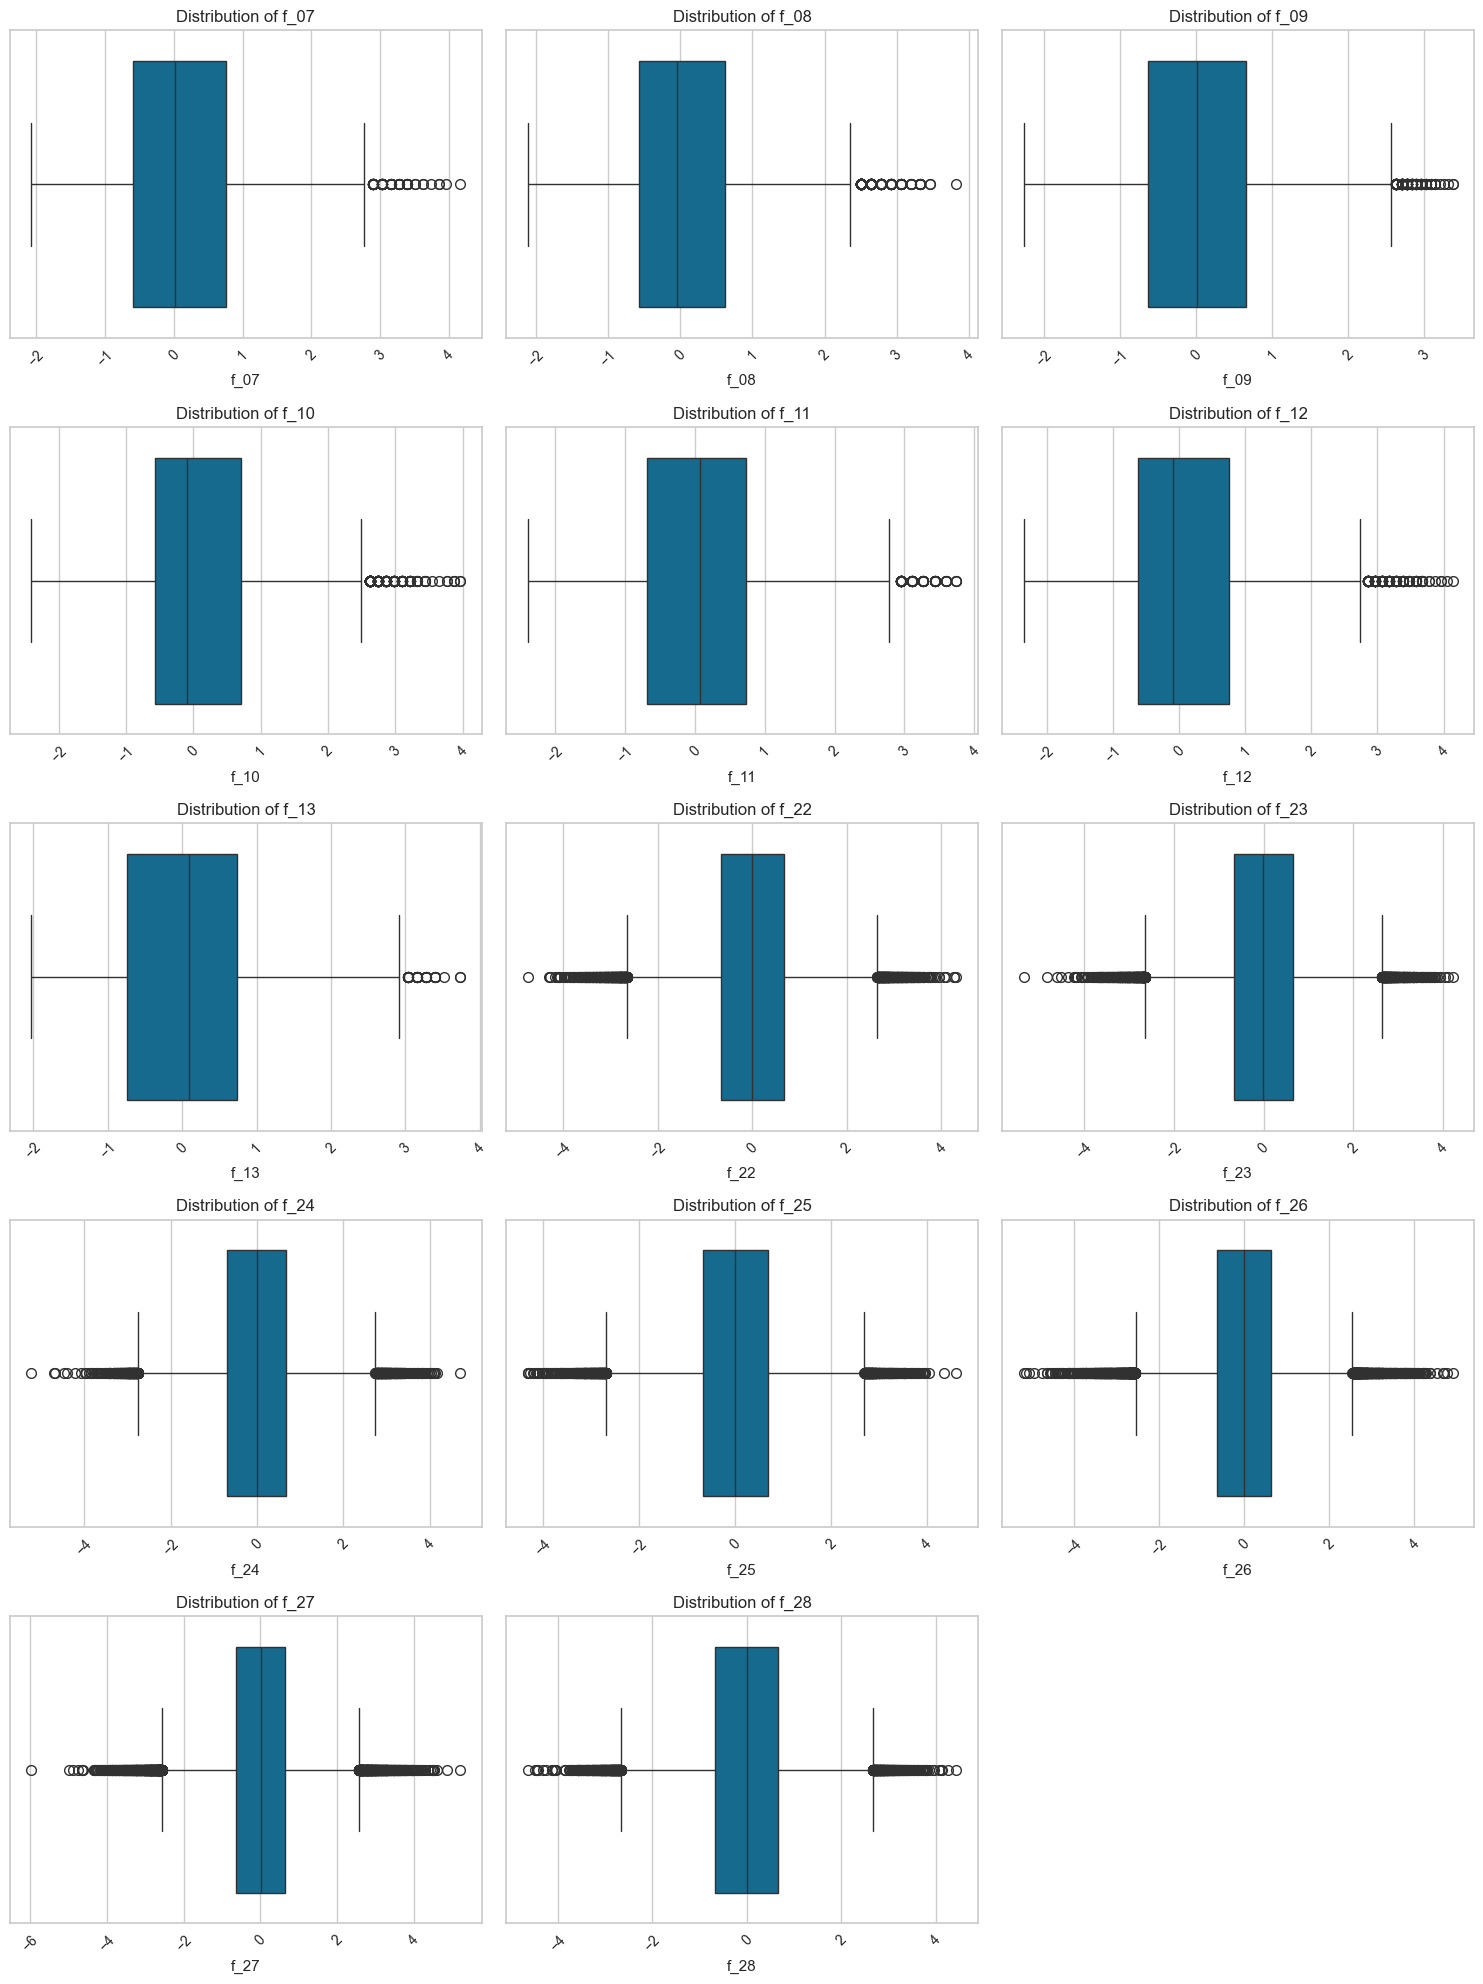

In [15]:
box_plots(X, X.columns)

In [16]:
X.head()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.977987,1.383372,1.039938,-0.567775,1.142180,-0.083596,0.086073,-0.707876,0.911477,-0.678852,0.768543,0.960344,1.042536,0.694234
1,-0.977987,-0.875405,-0.179925,-0.837020,-0.420725,1.725834,0.738456,-0.535582,0.453824,1.031505,-0.117686,-0.550783,0.367242,-1.636652
2,0.021718,1.017648,-0.394246,0.124844,0.296135,-0.928325,1.118063,2.203065,0.086974,-1.519163,-0.568662,0.978900,-0.926277,-2.296373
3,0.286548,-1.213526,0.917564,0.124844,0.296135,-0.083596,-0.434221,0.731623,-1.218086,0.826492,-1.173592,-0.395085,-0.100021,0.326682
4,0.756900,0.187543,-0.394246,-1.135381,-1.954502,1.271662,1.118063,0.228337,-1.482684,0.847999,-0.613935,1.164389,-0.374203,-1.160058


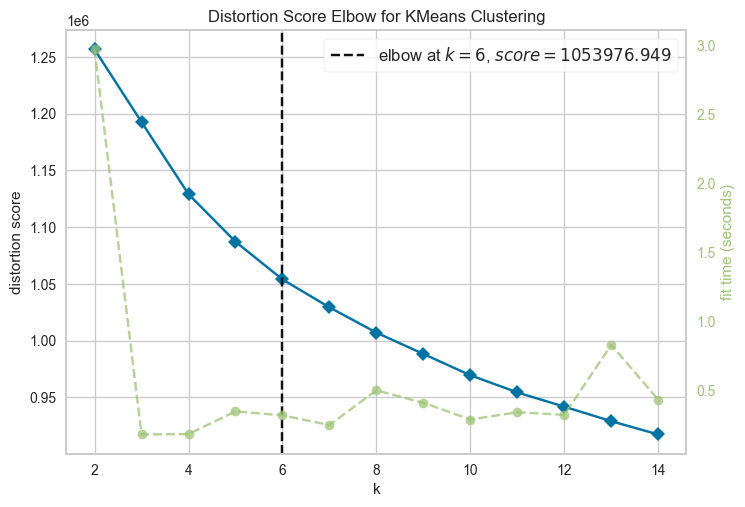

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
k_elbow_iter=KElbowVisualizer(KMeans(), k=(2, 15))
k_elbow_iter.fit(X)
k_elbow_iter.show()

In [18]:
def remove_outliers_iqr(df, columns=None):
    df_cleaned = df.copy()
    if columns is None:
        columns = df_cleaned.select_dtypes(include=[np.number]).columns
    
    for col in columns:
        if col in df_cleaned.columns:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

features = int_features + float_features

df_filtered_ints = remove_outliers_iqr(X[int_features], columns=int_features)

df_without_outliers = X.loc[df_filtered_ints.index, features].copy()

print(f"Осталось строк: {df_without_outliers.shape[0]} из {X.shape[0]}")

Осталось строк: 96333 из 98000


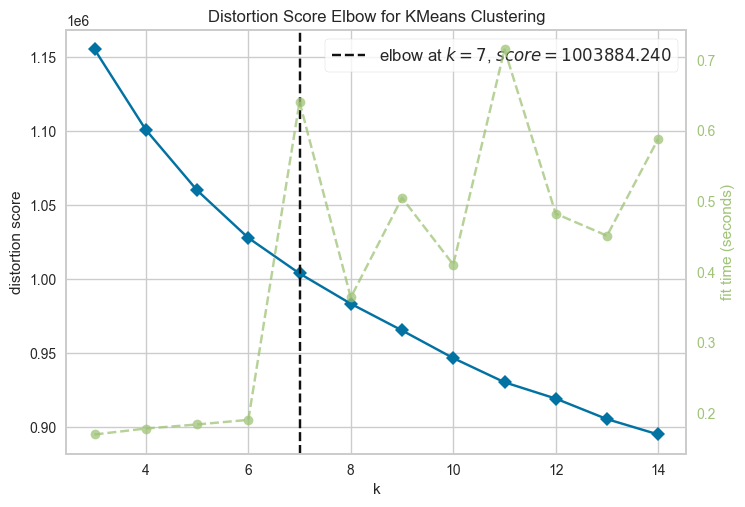

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
k_elbow_iter=KElbowVisualizer(KMeans(),k=(3,15))
k_elbow_iter.fit(df_without_outliers)
k_elbow_iter.show()

# k-means with outliers

In [20]:
model = KMeans(n_clusters=6, random_state=42, n_init=10, init='k-means++')

labels = model.fit_predict(X)
X['Predicted'] = labels

score = silhouette_score(X, labels, metric='euclidean', sample_size=50000, random_state=42)

print(f"Silhouette Score: {score}")
print(f"\nРаспределение по кластерам:\n{X['Predicted'].value_counts().sort_index()}")

Silhouette Score: 0.1350391076471071

Распределение по кластерам:
Predicted
0    15744
1    13164
2    15992
3    18351
4    17296
5    17453
Name: count, dtype: int64


In [21]:
res = pd.DataFrame(
    {
        'id' : X.index,
        'Predicted' : X['Predicted']
    }
).reset_index(drop=True)

In [22]:
res.to_csv('k_means.csv', index=False)

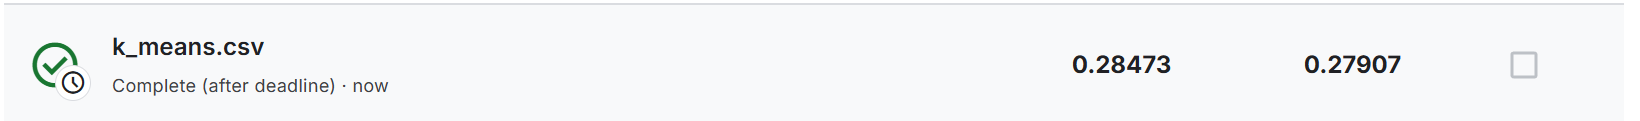

# k-means without outliers

In [23]:
X.drop('Predicted', axis=1, inplace=True)

In [ ]:
model = KMeans(n_clusters=7, random_state=42, n_init=10, init='k-means++')

model.fit(df_without_outliers)
labels = model.predict(X)
X['Predicted'] = labels

score = silhouette_score(X, labels, metric='euclidean', sample_size=10000, random_state=42)

print(f"Silhouette Score: {score}")
print(f"\nРаспределение по кластерам:\n{X['Predicted'].value_counts().sort_index()}")

Silhouette Score: 0.1331422555600932

Распределение по кластерам:
Predicted
0    13834
1    16747
2    13916
3    12695
4    13335
5    12715
6    14758
Name: count, dtype: int64


In [25]:
res = pd.DataFrame(
    {
        'id' : X.index,
        'Predicted' : X['Predicted']
    }
).reset_index(drop=True)
res.to_csv('k_means_without_outliers.csv', index=False)

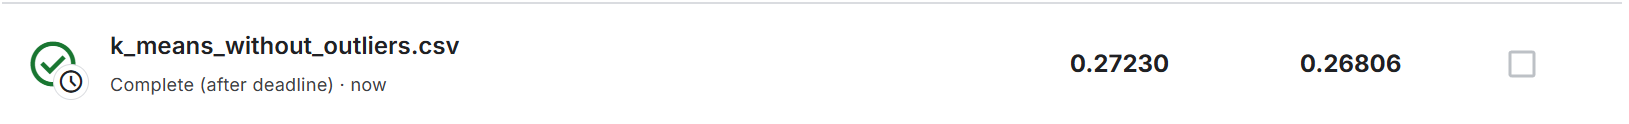

# GM with outliers

In [26]:
X.drop(columns=['Predicted'], axis=1, inplace=True)

In [27]:
gmm = GaussianMixture(
    n_components=6, 
    covariance_type='full', 
    max_iter=500,
    random_state=42,
    n_init=5 
)

gmm.fit(X)

labels = gmm.predict(X)

X['Predicted'] = labels

print(f"Распределение по кластерам \n{X['Predicted'].value_counts().sort_index()}")

Распределение по кластерам 
Predicted
0    22201
1    12938
2    13804
3    20708
4    11086
5    17263
Name: count, dtype: int64


In [28]:
res = pd.DataFrame(
    {
        'id' : X.index,
        'Predicted' : X['Predicted']
    }
).reset_index(drop=True)
res.to_csv('gmm.csv', index=False)

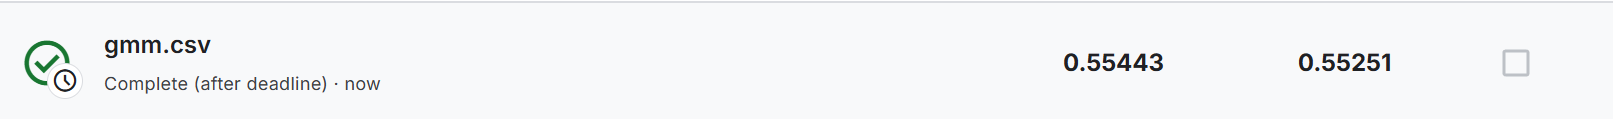
# GMM without outliers

In [29]:
X.drop(columns=['Predicted'], axis=1, inplace=True)

In [30]:
gmm = GaussianMixture(
    n_components=7, 
    covariance_type='full', 
    max_iter=500,
    random_state=42,
    n_init=5 
)

gmm.fit(df_without_outliers)

labels = gmm.predict(X)

X['Predicted'] = labels
print(f"Распределение по кластерам\n{X['Predicted'].value_counts().sort_index()}")

Распределение по кластерам
Predicted
0    13711
1    16866
2    18045
3    14096
4    13413
5     9184
6    12685
Name: count, dtype: int64


In [31]:
res = pd.DataFrame(
    {
        'id' : X.index,
        'Predicted' : X['Predicted']
    }
).reset_index(drop=True)
res.to_csv('gmm_without_outliers.csv', index=False)

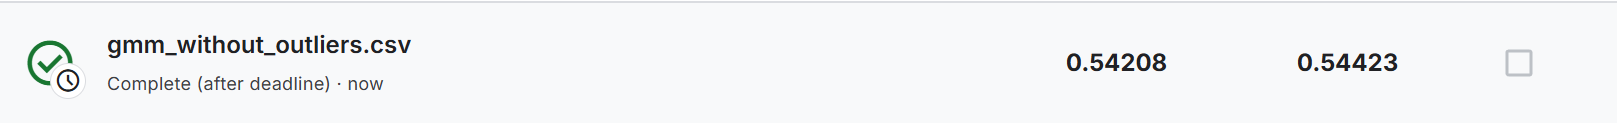

# BGM with outliers

In [32]:
X.drop(columns=['Predicted'], axis=1, inplace=True)

In [33]:
bgm = BayesianGaussianMixture(
    n_components=6,        
    covariance_type='full',
    random_state=42,
    n_init=3,
    max_iter=1000             
)

bgm.fit(X)
labels = bgm.predict(X)

In [34]:
res = pd.DataFrame(
    {
        'id' : X.index,
        'Predicted' : labels
    }
).reset_index(drop=True)
res.to_csv('bgm.csv', index=False)

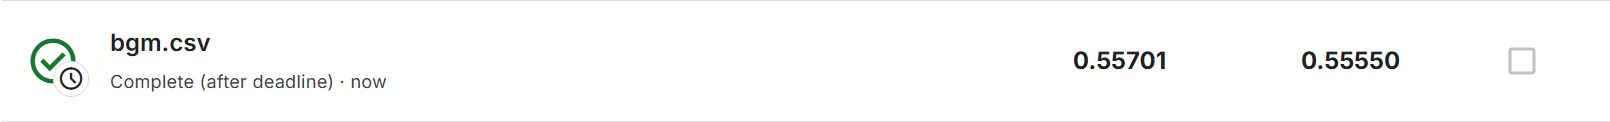

# BGM without outliers

In [35]:
bgm = BayesianGaussianMixture(
    n_components=7,          
    covariance_type='full',
    random_state=42,
    n_init=3,
    max_iter=1000             
)

bgm.fit(df_without_outliers)
labels = bgm.predict(X)

In [36]:
res = pd.DataFrame(
    {
        'id' : X.index,
        'Predicted' : labels
    }
).reset_index(drop=True)
res.to_csv('bgm_without_outliers.csv', index=False)

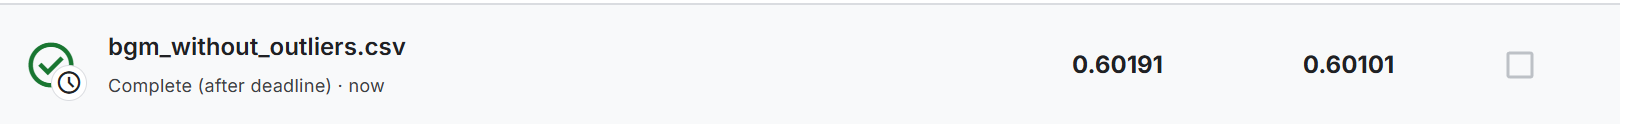
Лучшая модель BGM без выбросов

In [37]:
X['predicted'] = labels
X.head()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28,predicted
0,-0.977987,1.383372,1.039938,-0.567775,1.142180,-0.083596,0.086073,-0.707876,0.911477,-0.678852,0.768543,0.960344,1.042536,0.694234,2
1,-0.977987,-0.875405,-0.179925,-0.837020,-0.420725,1.725834,0.738456,-0.535582,0.453824,1.031505,-0.117686,-0.550783,0.367242,-1.636652,4
2,0.021718,1.017648,-0.394246,0.124844,0.296135,-0.928325,1.118063,2.203065,0.086974,-1.519163,-0.568662,0.978900,-0.926277,-2.296373,2
3,0.286548,-1.213526,0.917564,0.124844,0.296135,-0.083596,-0.434221,0.731623,-1.218086,0.826492,-1.173592,-0.395085,-0.100021,0.326682,3
4,0.756900,0.187543,-0.394246,-1.135381,-1.954502,1.271662,1.118063,0.228337,-1.482684,0.847999,-0.613935,1.164389,-0.374203,-1.160058,5


In [38]:
X['predicted'].value_counts()

predicted
5    16807
6    16049
0    16004
2    13708
3    13042
1    11232
4    11158
Name: count, dtype: int64

# Визуализация

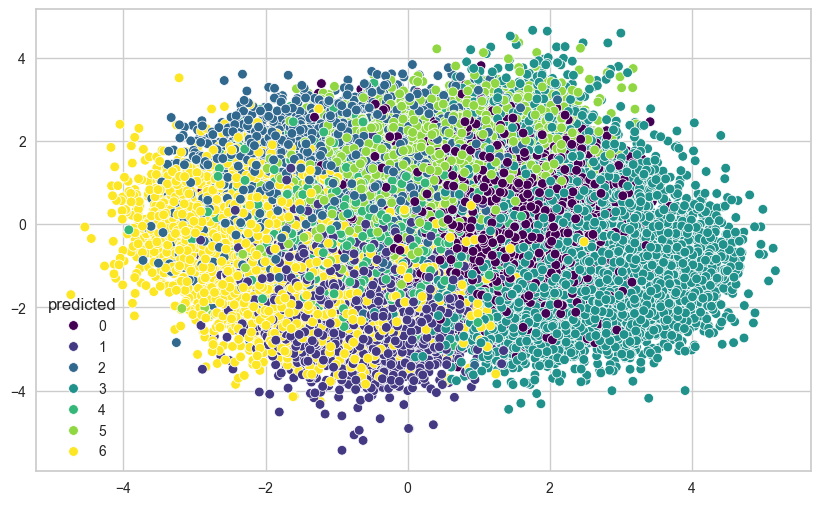

In [39]:
pca = PCA(n_components=2)
components = pca.fit_transform(X.drop(columns=['predicted']))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=X['predicted'], palette='viridis')
plt.show()